# Model Evaluation on Pipelines
We stray away from .py files here so that we can evaluate each pipeline with some nice visualizations

In [16]:
from methods.process import Experiment
import matplotlib.pyplot as plt
experiment = Experiment()

[13:07:11:961] Cleaning data...
[13:07:11:963] Removing uppercase letters...
[13:07:14:501] Removing punctuation...
[13:07:14:996] Decoding HTML attributes...
[13:07:15:716] Removing stopwords...
[13:07:28:069] Splitting the dataframe into train/test sets...


In [17]:
# Setting the global N variable -> top N features
N = 20

# Setting the feature & coefficient extraction function:
def get_top_features(model, vectorizer, n_top_features=N):
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_.flatten() if hasattr(model, 'coef_') else model.coef_[0]
    feature_coefficients = list(zip(feature_names, coefficients))
    sorted_features = sorted(feature_coefficients, key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:n_top_features]
    return top_features

# Setting the plotting function
def plot_top_features(top_features, model_name):
    top_feature_names, top_coefficients = zip(*top_features)

    # Create a bar chart to visualize the coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_feature_names)), top_coefficients, align='center')
    plt.yticks(range(len(top_feature_names)), top_feature_names)
    plt.xlabel('Coefficient Value')
    plt.title(f'Top Features for {model_name}')
    plt.show()

## Logistic Regression

We load the pipeline from the `Experiment` class and extract the `feature_names` from the vectorizer + the `coefficients` from the model.

In [3]:
# This step usually takes around 7-8 minutes on my computer (nice coffee break)
logistic_pipeline = experiment.perform_single_experiment(
    pipeline_model='logistic',
    return_pipe=True,
)
logistic_vectorizer = logistic_pipeline.named_steps['vectorizer']
logistic_model = logistic_pipeline.named_steps['classifier']

[20:41:15:455] The pipeline: "logistic" selected with the resampling method: "random-under"


C:\Users\atabekis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ........ (step 1 of 3) Processing vectorizer, total= 6.0min
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total= 4.5min
[20:51:47:551] Experiment "logistic" took 632.10 seconds.


In [5]:
logistic_top_features = get_top_features(logistic_model, logistic_vectorizer)
logistic_top_features

[('entp', 6.738731647679113),
 ('entps', 3.1982961752889465),
 ('enfp', 3.011389345137607),
 ('entj', 2.3201761562200485),
 ('trans', 2.028568921266331),
 ('estp', 1.9662887279172758),
 ('ne', 1.739517155714201),
 ('shit', 1.6941060803684886),
 ('de', 1.6400001297746445),
 ('man', 1.6052839939908088),
 ('lmao', 1.5634808390379675),
 ('en', 1.4697816166948592),
 ('argument', 1.46948003650298),
 ('det', 1.4092470767329146),
 ('fuck', 1.3555204049890248),
 ('cis', 1.3025368409172358),
 ('tbh', 1.2697357641224205),
 ('dysphoria', 1.2650523938005251),
 ('literally', 1.2257433318278632),
 ('isn', 1.200734476909719)]

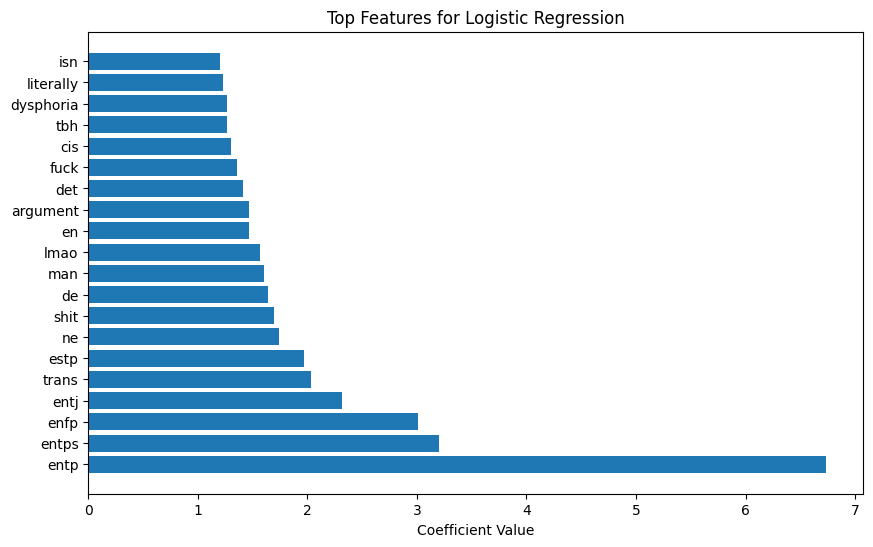

In [10]:
plot_top_features(logistic_top_features, model_name='Logistic Regression')

## LinearSVC

In [11]:
linear_svc_pipeline = experiment.perform_single_experiment(
    pipeline_model='svm',
    return_pipe=True,
    save_pipe=True
)
linear_svc_vectorizer = linear_svc_pipeline.named_steps['vectorizer']
linear_svc_model = linear_svc_pipeline.named_steps['classifier']

[21:24:26:784] The pipeline: "svm" selected with the resampling method: "random-under"


C:\Users\atabekis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ........ (step 1 of 3) Processing vectorizer, total= 6.1min
[Pipeline] ......... (step 2 of 3) Processing resampler, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=  12.7s
[21:30:46:213] Experiment "svm" took 379.43 seconds.
[21:30:46:213] Saving the pipeline "svm_random-under"
[21:33:31:371] Successfully saved the pipeline "svm_random-under"


In [12]:
linear_svc_top_features = get_top_features(linear_svc_model, linear_svc_vectorizer)
linear_svc_top_features

[('entp', 8.26922753376524),
 ('entps', 3.8292847016983065),
 ('enfp', 3.6958653903237635),
 ('entj', 2.9536411923735573),
 ('estp', 2.289000813316037),
 ('trans', 1.9914819092589562),
 ('shit', 1.843282121480162),
 ('ne', 1.791957573149833),
 ('argument', 1.787750494559422),
 ('man', 1.7357774683635916),
 ('literally', 1.4912970740249143),
 ('lmao', 1.4882700031480565),
 ('debate', 1.4384048941666654),
 ('tbh', 1.4333200497738534),
 ('enfps', 1.406910422750719),
 ('cis', 1.3784259041900826),
 ('funny', 1.341917446545724),
 ('dysphoria', 1.3379356269867264),
 ('da', 1.3216184606595778),
 ('fuck', 1.3208627089312548)]

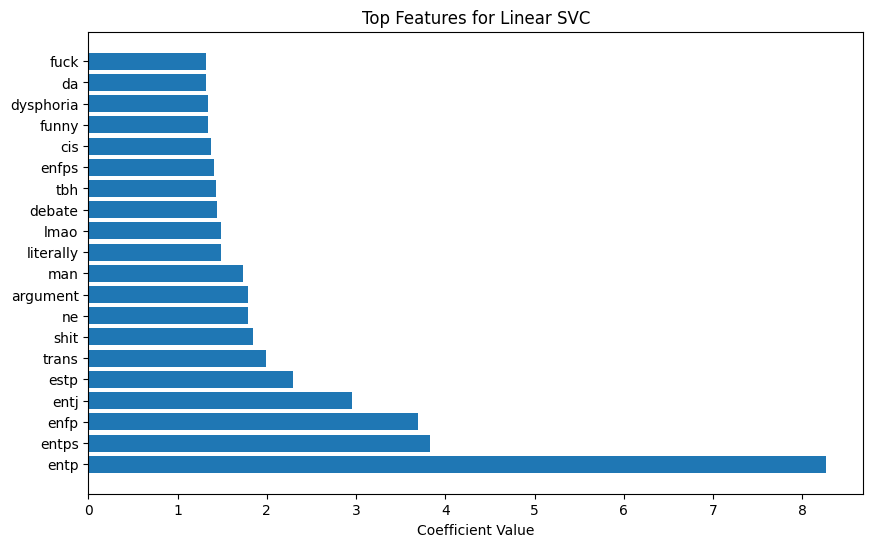

In [13]:
plot_top_features(linear_svc_top_features, model_name='Linear SVC')

## Naive Bayes

In [18]:
naive_bayes_pipeline = experiment.perform_single_experiment(
    pipeline_model='naive-bayes',
    return_pipe=True,
    save_pipe=True
)
nb_vectorizer = naive_bayes_pipeline.named_steps['vectorizer'].get_feature_names_out()
nb_model = naive_bayes_pipeline.named_steps['classifier'].feature_log_prob_[1]

[13:07:47:463] Existing pipeline found, loading "naive-bayes_random-under"


In [21]:
nb_top_features = sorted(list(zip(nb_vectorizer, nb_model)), key=lambda x: x[1], reverse=True)[:N]

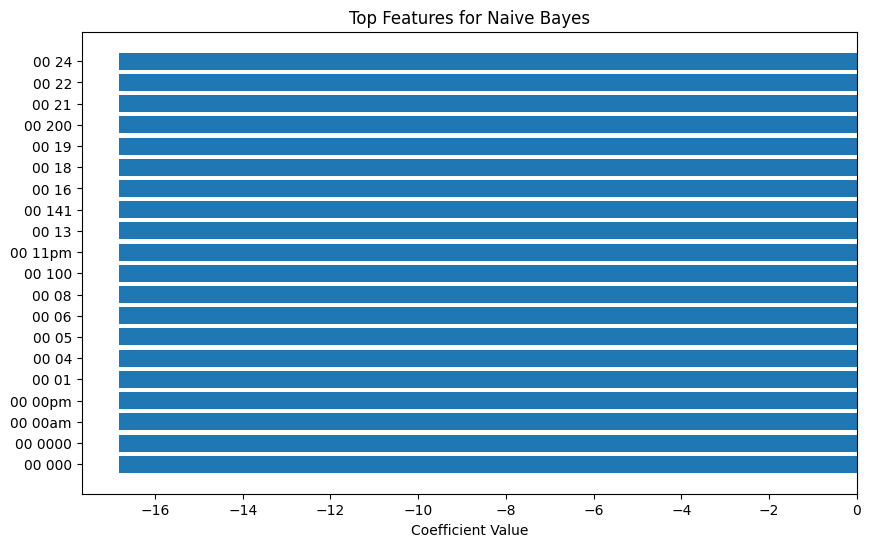

In [22]:
plot_top_features(nb_top_features, model_name='Naive Bayes')

In [ ]:
random_over_experiment = Experiment(
    time_experiments=True,
    verbose=True
)
random_over_experiment.resampling_method = 'random-over'

random_over_experiment.perform_single_experiment(
    pipeline_model='logistic'
)